In [94]:
# Importing the necessary libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [95]:
# Importing the swimming dataset
df = pd.read_csv("Olympic_Swimming_Results_1912to2020.csv")

In [96]:
# Viewing the dataset
df.head()

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4


In [97]:
# Getting basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              4359 non-null   object
 1   Year                  4359 non-null   int64 
 2   Distance (in meters)  4359 non-null   object
 3   Stroke                4359 non-null   object
 4   Relay?                4359 non-null   int64 
 5   Gender                4359 non-null   object
 6   Team                  4359 non-null   object
 7   Athlete               4345 non-null   object
 8   Results               4331 non-null   object
 9   Rank                  4359 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 340.7+ KB


In [98]:
# Removing null values
df = df.dropna()

In [99]:
# Changing the type of column values
df['Distance (in meters)'] = df['Distance (in meters)'].apply(lambda x: re.sub('\D', '', x))
df['Distance (in meters)'] = df['Distance (in meters)'].astype(int)

In [100]:
# Viewing the dataset after change
df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4353,Stockholm,1912,4100,Freestyle,1,Women,AUT,"Margarete Adler, Bertha Zahourek, Josephine St...",00:06:17.000000,4
4355,Stockholm,1912,4200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


In [101]:
# Observing that there are inconsistent values ​​in the Results column, this column must be treated
df["Results"] = pd.to_numeric(df["Results"], errors='coerce')

In [102]:
# I passed all values ​​in the results column to numeric, and all those that could not be converted, I passed to NaN
df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100,Backstroke,0,Men,ROC,Kliment Kolesnikov,52.00,2
2,Tokyo,2020,100,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100,Backstroke,0,Men,ITA,Thomas Ceccon,52.30,4
4,Tokyo,2020,100,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4353,Stockholm,1912,4100,Freestyle,1,Women,AUT,"Margarete Adler, Bertha Zahourek, Josephine St...",NaN,4
4355,Stockholm,1912,4200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",NaN,1
4356,Stockholm,1912,4200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",NaN,2
4357,Stockholm,1912,4200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",NaN,3


In [103]:
# Now, drop the NaN
df = df.dropna(subset=["Results"])

In [104]:
# # Viewing the dataset after change
df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100,Backstroke,0,Men,ROC,Kliment Kolesnikov,52.00,2
2,Tokyo,2020,100,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100,Backstroke,0,Men,ITA,Thomas Ceccon,52.30,4
4,Tokyo,2020,100,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4019,Angeles,1932,100,Freestyle,0,Men,JPN,Zenjiro Takahashi,59.20,4
4020,Angeles,1932,100,Freestyle,0,Men,USA,Raymond Webb Jr. Thompson,59.50,4
4091,Amsterdam,1928,100,Freestyle,0,Men,USA,Johnny Weissmuller,58.60,4
4092,Amsterdam,1928,100,Freestyle,0,Men,HUN,Istvan Barany,59.80,4


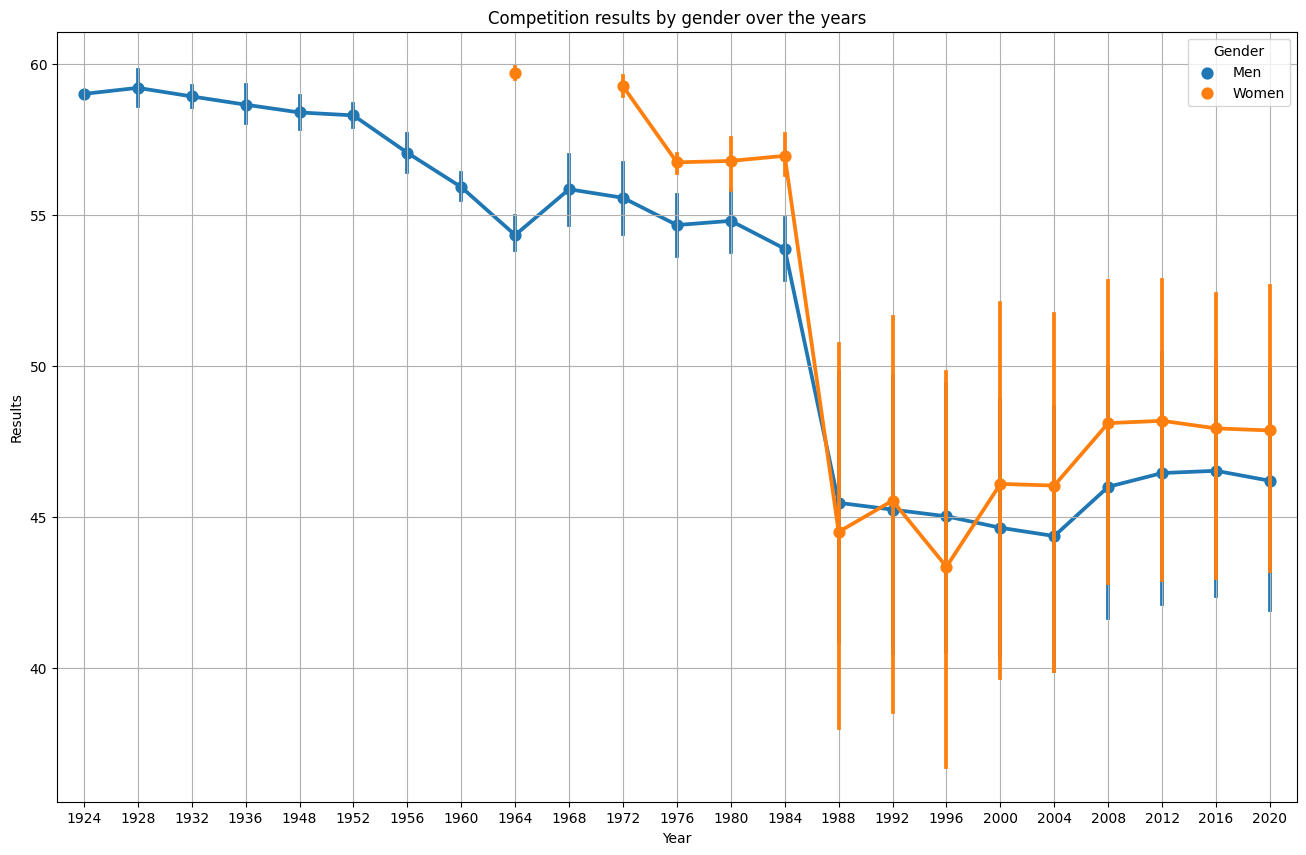

In [105]:
_, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,10))
sns.pointplot(data=df, x="Year", y="Results", hue="Gender", estimator="mean")
ax.set_title("Competition results by gender over the years")
ax.grid()

In [106]:
# Viewing all stroke groups
groups = np.unique(df["Stroke"]).tolist()
groups

['Backstroke', 'Breaststroke', 'Butterfly', 'Freestyle']

In [107]:
df_backstroke_filtered = df[df["Stroke"] == "Backstroke"]
df_Breaststroke_filtered = df[df["Stroke"] == "Breaststroke"]
df_Butterfly_filtered = df[df["Stroke"] == "Butterfly"]
df_freestyle_filtered = df[df["Stroke"] == "Freestyle"]

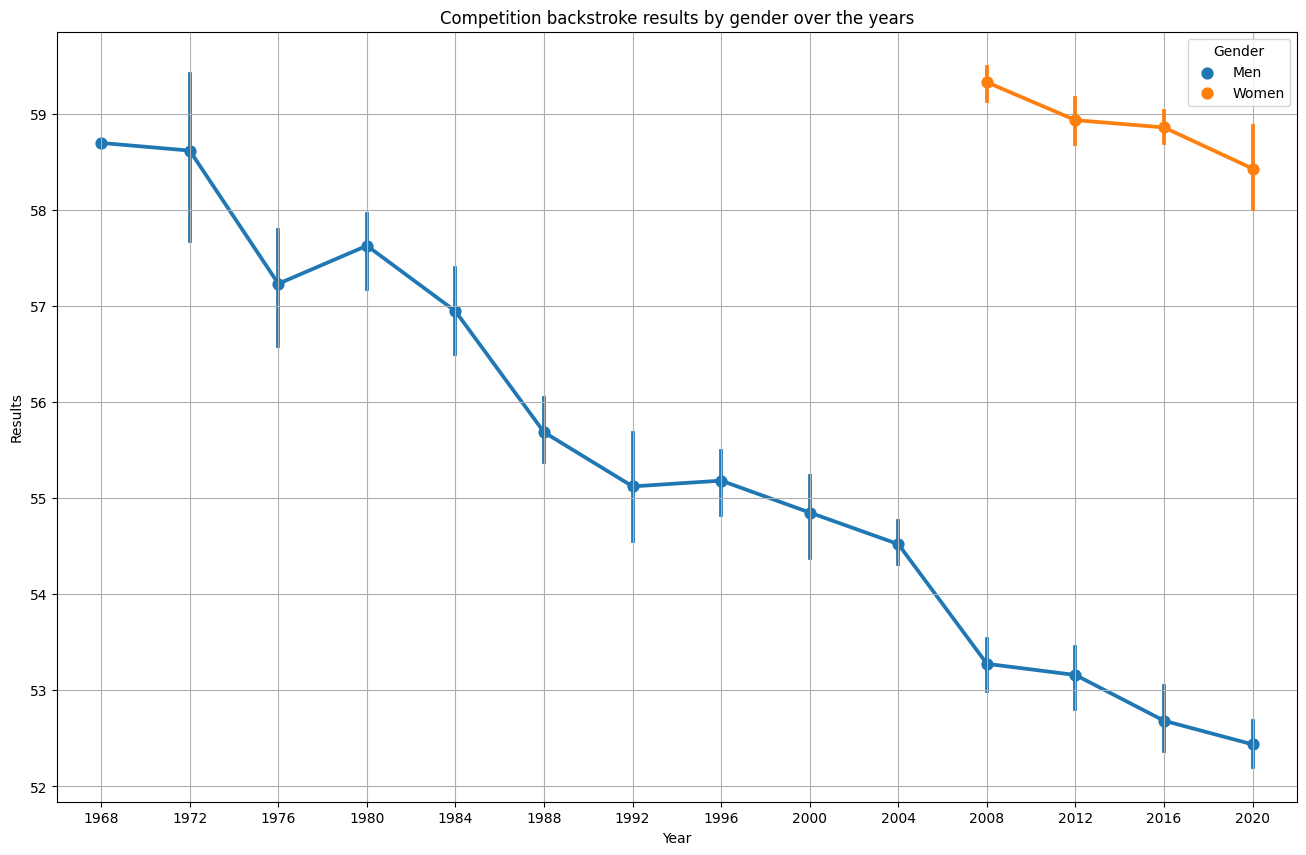

In [108]:
_, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,10))
sns.pointplot(data=df_backstroke_filtered, x="Year", y="Results", hue="Gender", estimator="mean")
ax.set_title("Competition backstroke results by gender over the years")
ax.grid()

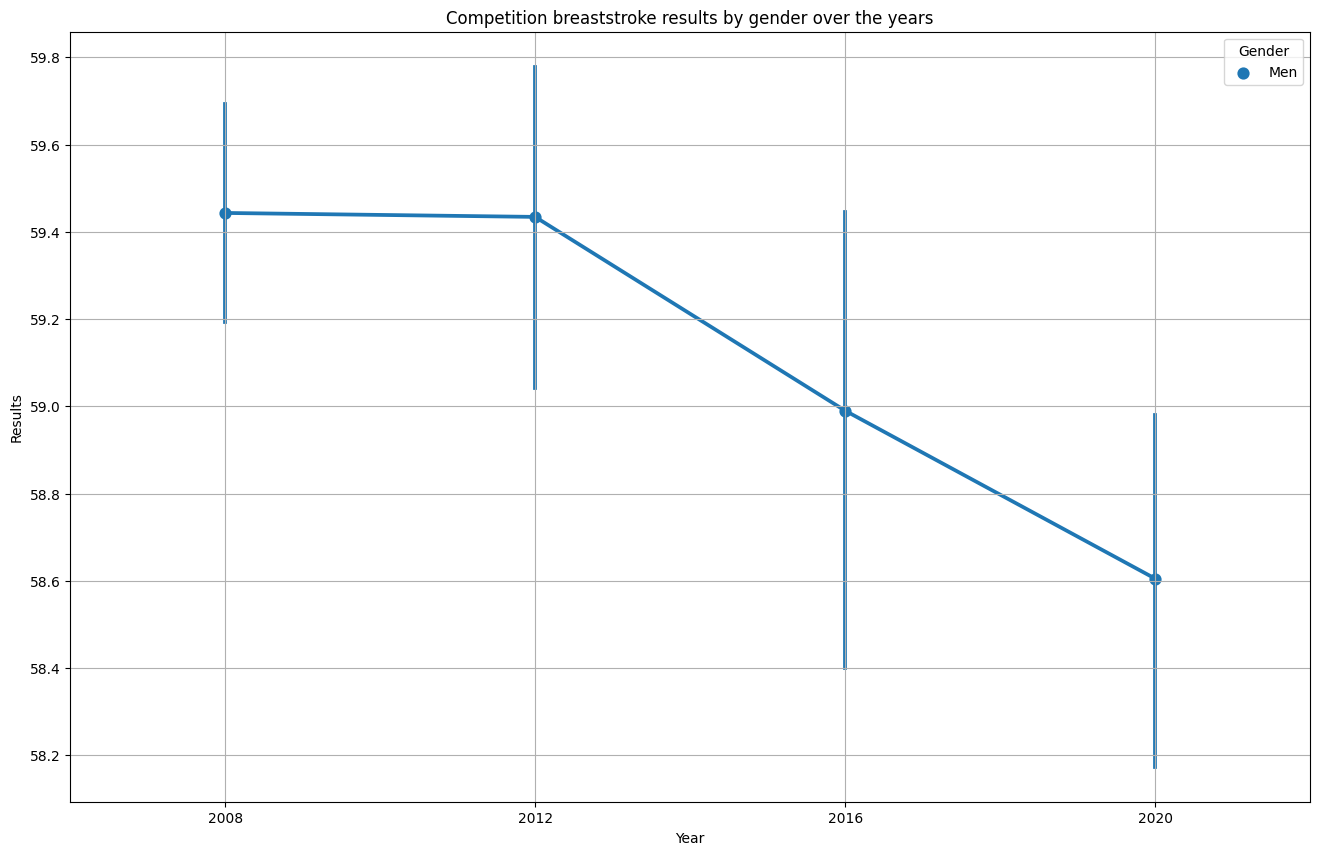

In [109]:
_, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,10))
sns.pointplot(data=df_Breaststroke_filtered, x="Year", y="Results", hue="Gender", estimator="mean")
ax.set_title("Competition breaststroke results by gender over the years")
ax.grid()

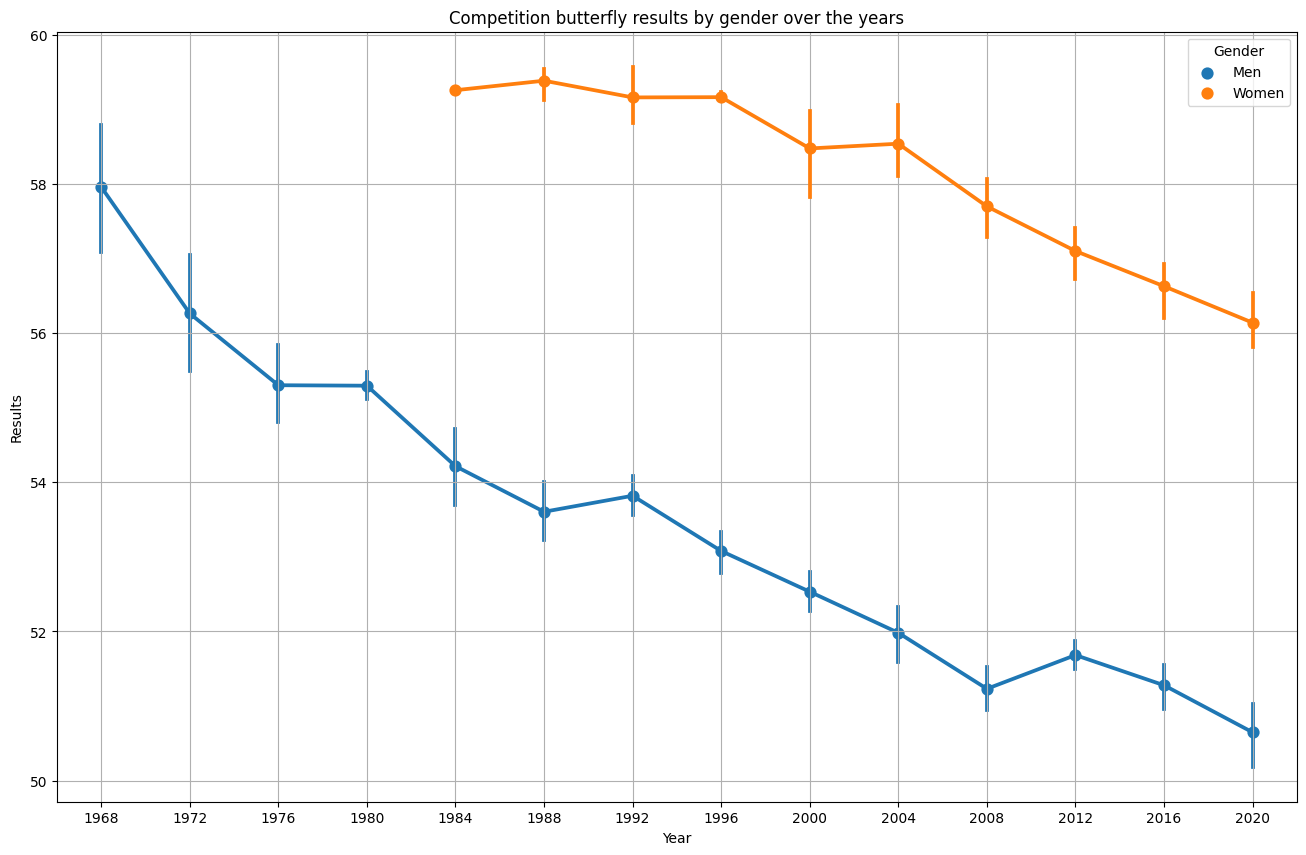

In [110]:
_, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,10))
sns.pointplot(data=df_Butterfly_filtered, x="Year", y="Results", hue="Gender", estimator="mean")
ax.set_title("Competition butterfly results by gender over the years")
ax.grid()

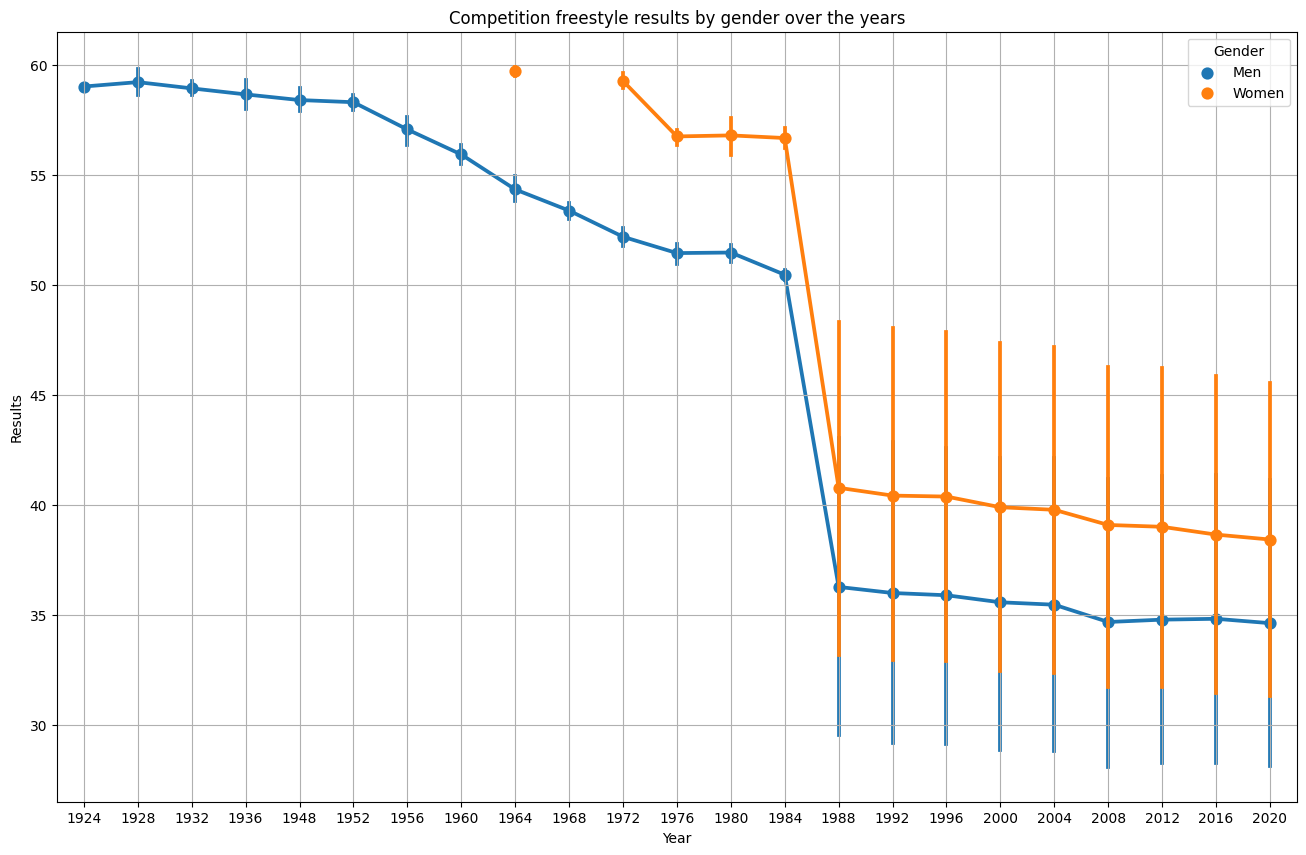

In [111]:
_, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,10))
sns.pointplot(data=df_freestyle_filtered, x="Year", y="Results", hue="Gender", estimator="mean")
ax.set_title("Competition freestyle results by gender over the years")
ax.grid()

Text(0.5, 1.0, 'Mean distribution of results by gender')

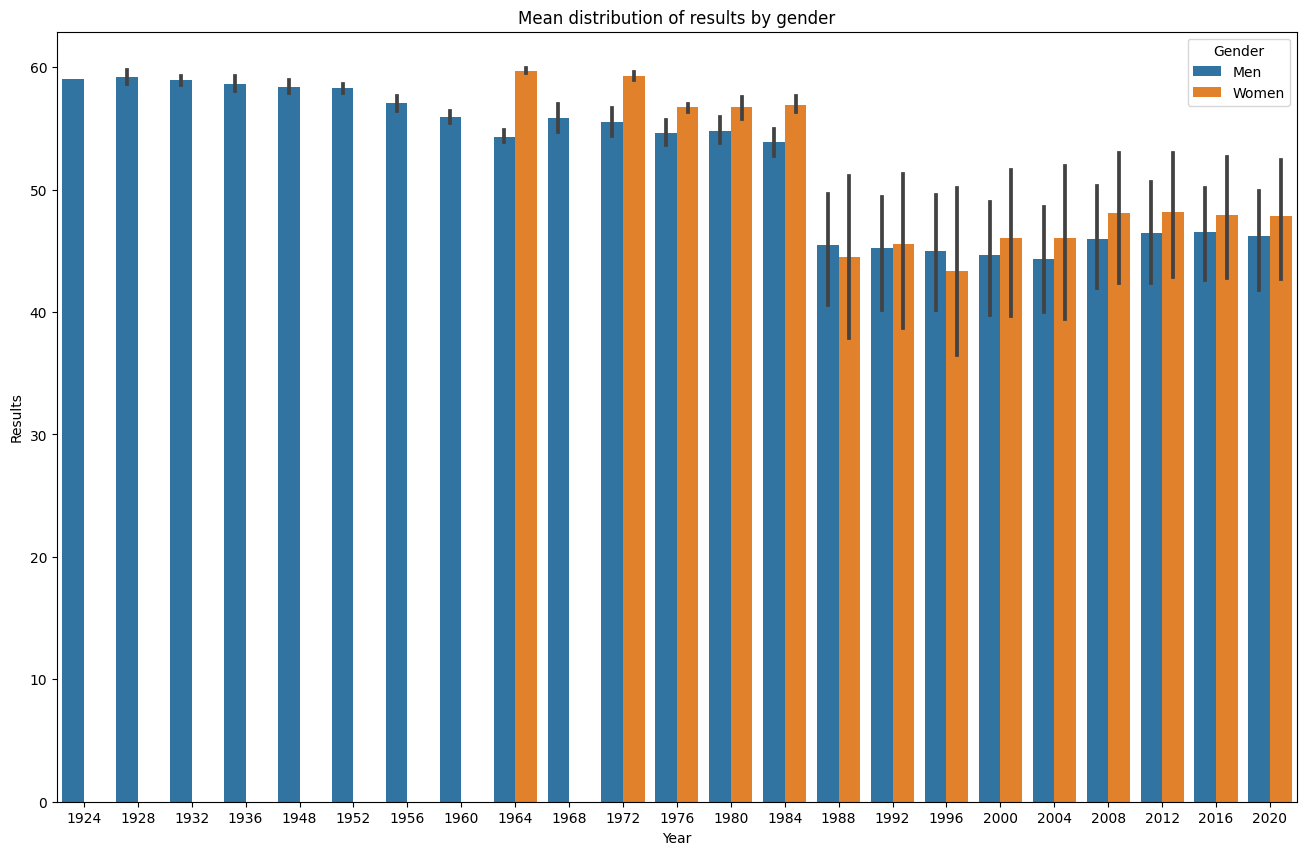

In [112]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(data=df, x="Year", y="Results", hue="Gender", estimator="mean")
ax.set_title("Mean distribution of results by gender")

In [115]:
# Viewing the best 10 teams
performance = df.groupby("Team")["Results"].mean().reset_index()
performance = performance.sort_values(by="Results", ascending=False)
performance = performance.reset_index(drop=True)
performance.head(10)

,Team,Results
0,KAZ,59.950000
1,NOR,59.200000
2,ZIM,59.190000
3,TCH,57.740000
4,ISR,57.635000
5,HUN,56.017857
6,JPN,55.940357
7,NZL,55.915000
8,CRC,55.900000
9,CAN,54.712381


Text(0.5, 1.0, 'Mean results for teams during years')

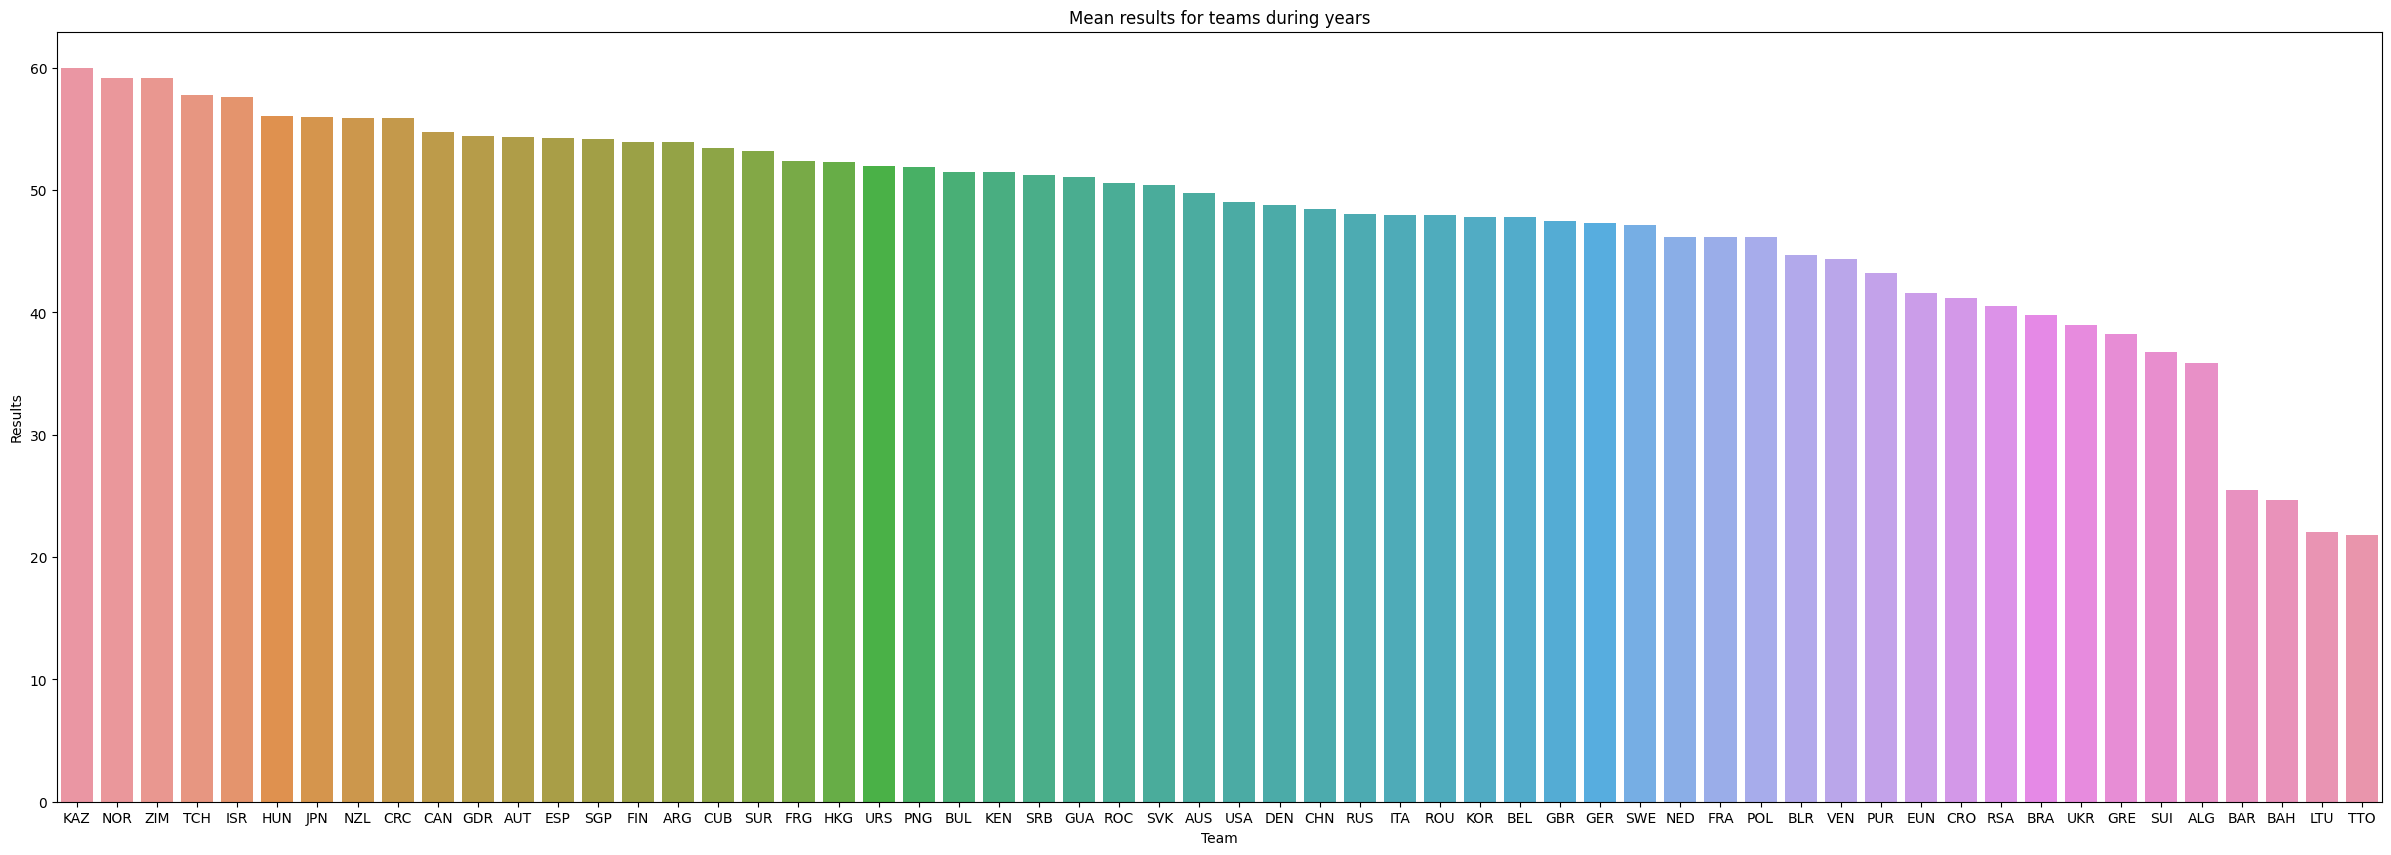

In [116]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(data=performance, x="Team", y="Results")
ax.set_title("Mean results for teams during years")